In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import scipy.special as sp
np.random.seed(42)

In [2]:

def adfibo(alpha, n, x):
    s = 0*x
    for i in range(int(np.ceil(alpha)),n+1):
        if (i+n)%2==0:
            s=s+0
        else:
            s=s+(sp.gamma((n+i+1)/2))/(sp.gamma(i-alpha+1)*sp.gamma((n-i+1)/2))*x**(i-alpha)
    return s

def Input(x,degree,alpha):
    inp_x = []
    for i in range(1,degree+1):
        inp_x.append(adfibo(alpha,i,x))
    return np.array([inp_x])

def Neural_Network(input,degree,alpha,weights):
    z=[]
    z.append(Input(input, degree, alpha))
    z.append(np.dot(z[0],weights.T))
    return z[1], z[0]



def f(t,alpha):
    return 1-4*t+5*t**2-(4*t**(1-alpha))/(sp.gamma(2-alpha))+(10*t**(2-alpha))/(sp.gamma(3-alpha))


In [3]:
def prob(input,degree,weights, alpha):
    tri_w = np.zeros_like(weights)
    h = np.zeros((len(weights[0]),len(weights[0])))
    error1  = 0
    error2  = 0
    z_int, dw_int = Neural_Network(0,degree,0,weights)
    for l in input:
        z_1, dw_1 = Neural_Network(l,degree,alpha,weights)
        z, dw = Neural_Network(l,degree,0,weights)
        
        tri_w =tri_w +2*(z_1 + z -f(l,alpha))*(dw_1 + dw )
        
        for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                     h[i,j]=h[i,j]+2*(dw_1[0,i] + dw[0,i] )*(dw_1[0,j] + dw[0,j] )
    
        error1=error1+(z_1 +z -f(l,alpha))**2
        error2=error2+(z_1 +z -f(l,alpha))**2
        
    tri_w = tri_w/(2*len(input)) + (z_int-1)*dw_int
    for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                      h[i,j]=h[i,j]/(2*len(input))+ dw_int[0,i]*dw_int[0,j]
                     
    error1=error1/(2*len(input)) +1/2*(z_int-1)**2
        
    return error1, error2/(2*len(input)),tri_w,h


def feed_farward(input, degree,accuracy,iter, alpha):
    w = r.random_sample((1,degree))
    k=0
    lem = 10**4
    while k<iter:
        error1,error2, tri_w, h,  = prob(input,degree,w, alpha)
        
        if error1<accuracy:
            break
        else:
            w_next = w.T - np.dot(np.linalg.inv(h+lem*np.identity(len(h))),tri_w.T)
            error11,error22,_,_ = prob(input,degree,w_next.T, alpha)
            
            if error11<error1:
                w = w_next.T
                k= k+1
                lem = lem/2
                print(f"Number of iteration is {k} and error is {error11}") 
            else:
                lem = 2*lem
                print(f"lemda is increasing {lem}")
                if lem>10**(20):
                    print("Lemda is too large, stopping the process")
                    break
            
    return w, error11, error22
       
 

In [4]:
def Nsol(Input,degree, weights):
    z1, z2 = Neural_Network(Input,degree,0,weights)
    return z1[0,0]

def Exsol(t):
    return 1-4*t+5*t**2

def get_error_new():
    #input_train = np.linspace(0,1,11)
    input_train = np.random.uniform(0, 1, 10)
    degree = 3
    alpha = [0.25, 0.5, 0.75, 1]
    relative_errors = []
    absolute_errors = []
    input_error = np.linspace(0,1,101)
    for a in alpha:
        w , error1, error2 = feed_farward(input_train,degree,10**(-27),1000,a)
        absolute_error_temp = []
        ralative_error_temp = []
        for i in input_error:
            temp = abs(Nsol(i,degree,w)-Exsol(i))
            absolute_error_temp.append(temp)
            temp1 = temp/Exsol(i) if Exsol(i) != 0 else 0
            ralative_error_temp.append(temp1)
        absolute_errors.append(absolute_error_temp)
        relative_errors.append(ralative_error_temp)

    return absolute_errors, relative_errors
absolute_error, relative_error = get_error_new()

Number of iteration is 1 and error is [[2.46357101]]
Number of iteration is 2 and error is [[2.45862229]]
Number of iteration is 3 and error is [[2.44877824]]
Number of iteration is 4 and error is [[2.42930166]]
Number of iteration is 5 and error is [[2.39117808]]
Number of iteration is 6 and error is [[2.31812234]]
Number of iteration is 7 and error is [[2.18383075]]
Number of iteration is 8 and error is [[1.95593574]]
Number of iteration is 9 and error is [[1.62236909]]
Number of iteration is 10 and error is [[1.24415597]]
Number of iteration is 11 and error is [[0.95193084]]
Number of iteration is 12 and error is [[0.79745451]]
Number of iteration is 13 and error is [[0.70336984]]
Number of iteration is 14 and error is [[0.61951384]]
Number of iteration is 15 and error is [[0.54698815]]
Number of iteration is 16 and error is [[0.46931953]]
Number of iteration is 17 and error is [[0.35900594]]
Number of iteration is 18 and error is [[0.21752886]]
Number of iteration is 19 and error i

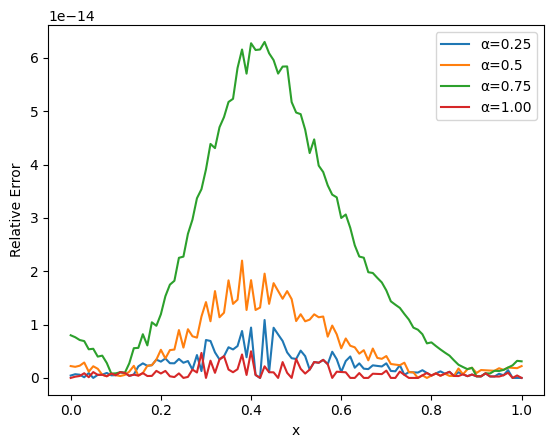

In [5]:
input = np.linspace(0,1,101)

plt.plot(input, relative_error[0],label="\u03B1=0.25")
plt.plot(input, relative_error[1], label="\u03B1=0.5")
plt.plot(input, relative_error[2], label ="\u03B1=0.75")
plt.plot(input, relative_error[3], label ="\u03B1=1.00")
plt.xlabel("x")
plt.ylabel("Relative Error")
plt.legend() 
# plt.grid(True)  
plt.savefig('line_plot1.png')

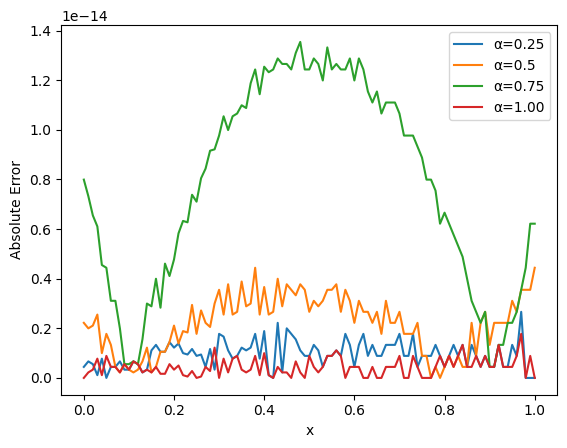

In [6]:
input = np.linspace(0,1,101)

plt.plot(input, absolute_error[0],label="\u03B1=0.25")
plt.plot(input, absolute_error[1], label="\u03B1=0.5")
plt.plot(input, absolute_error[2], label ="\u03B1=0.75")
plt.plot(input, absolute_error[3], label ="\u03B1=1.00")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend() 
# plt.grid(True)  
plt.savefig('line_plot2.png') 

In [7]:
alpha = [0.25, 0.5, 0.75, 1]
absolute_error = np.array(absolute_error)
for i in range(4):
    print("For =", alpha[i], "is", np.array([absolute_error[i,j] for j in range(0,101,10)])) 
    print(" ")

For = 0.25 is [4.44089210e-16 3.33066907e-16 1.22124533e-15 1.77635684e-15
 1.88737914e-15 8.88178420e-16 4.44089210e-16 1.77635684e-15
 4.44089210e-16 4.44089210e-16 0.00000000e+00]
 
For = 0.5 is [2.22044605e-15 3.33066907e-16 2.10942375e-15 3.55271368e-15
 3.66373598e-15 2.66453526e-15 2.22044605e-15 2.66453526e-15
 4.44089210e-16 1.33226763e-15 4.44089210e-15]
 
For = 0.75 is [7.99360578e-15 5.55111512e-16 4.77395901e-15 9.76996262e-15
 1.25455202e-14 1.24344979e-14 1.19904087e-14 1.06581410e-14
 6.66133815e-15 4.44089210e-16 6.21724894e-15]
 
For = 1 is [0.00000000e+00 3.33066907e-16 3.33066907e-16 0.00000000e+00
 9.99200722e-16 8.88178420e-16 4.44089210e-16 8.88178420e-16
 4.44089210e-16 4.44089210e-16 0.00000000e+00]
 


To generate comparison of numerical and exact solution

Number of iteration is 1 and error is [[4.41722279]]
Number of iteration is 2 and error is [[4.41569596]]
Number of iteration is 3 and error is [[4.41266177]]
Number of iteration is 4 and error is [[4.40667021]]
Number of iteration is 5 and error is [[4.39498608]]
Number of iteration is 6 and error is [[4.37275097]]
Number of iteration is 7 and error is [[4.33235746]]
Number of iteration is 8 and error is [[4.2648575]]
Number of iteration is 9 and error is [[4.16605773]]
Number of iteration is 10 and error is [[4.04140313]]
Number of iteration is 11 and error is [[3.88591947]]
Number of iteration is 12 and error is [[3.64877041]]
Number of iteration is 13 and error is [[3.24452329]]
Number of iteration is 14 and error is [[2.59799159]]
Number of iteration is 15 and error is [[1.71721467]]
Number of iteration is 16 and error is [[0.81101387]]
Number of iteration is 17 and error is [[0.22289093]]
Number of iteration is 18 and error is [[0.02814469]]
Number of iteration is 19 and error is

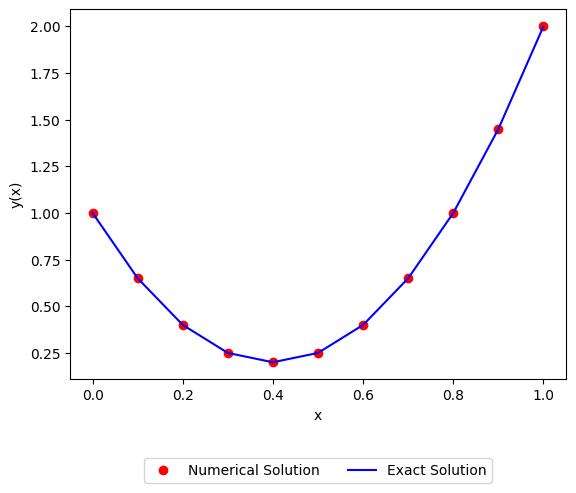

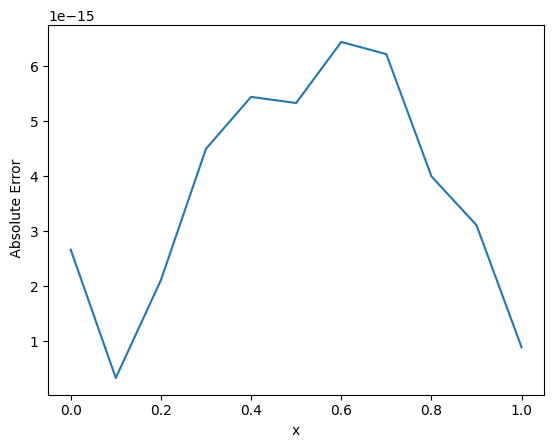

In [8]:
input = np.linspace(0,1,11)

degree = 3
alpha = 1

w , error1, error2 = feed_farward(input,degree,10**(-27),1000, alpha)

def Nsol(Input,degree, weights):
    z1, z2 = Neural_Network(Input,degree,0,weights)
    return z1[0,0]

def Exsol(t):
    return 1-4*t+5*t**2

exacSol = Exsol(input)

NumSol = []

for i in input:
    NumSol.append(Nsol(i,degree,w))

NumSol=np.array(NumSol)
    

error=abs(NumSol-exacSol)

plt.plot(input,NumSol, 'or',label="Numerical Solution")
plt.plot(input, exacSol, '-b',label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=5, fancybox=True)    
#plt.savefig('line_plot.pdf',bbox_inches='tight')
plt.show()

plt.plot(input, error)
plt.xlabel("x")
plt.ylabel(" Absolute Error")
#plt.savefig('pic3.pdf',bbox_inches='tight')  
plt.show()